In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

In [2]:
file = 'Food_Production.csv'
df = pd.read_csv(file)

In [3]:
df

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.60,5.846154,18786.2,14450.923080,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.80,3.943662,49576.3,69825.774650,13449.891480
5,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.754098,...,347.647059,59.1,0.628415,2.705882,1.202186,0.88,5.176471,2754.2,16201.176470,3762.568306
6,Cassava,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,0.708419,...,NaN,0.0,1.355236,14.666667,1.858316,1.81,20.111111,0.0,NaN,NaN
7,Cane Sugar,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6,4.820513,...,NaN,620.1,0.911681,NaN,0.581197,2.04,NaN,16438.6,NaN,4683.361823
8,Beet Sugar,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4,1.541311,...,NaN,217.7,0.515670,NaN,0.521368,1.83,NaN,9493.3,NaN,2704.643875
9,Other Pulses,0.0,0.0,1.1,0.0,0.1,0.4,0.0,1.6,5.008798,...,203.503036,435.7,0.524927,0.836058,4.565982,15.57,7.272303,22477.4,10498.552080,NaN


In [4]:
drop_df = df.dropna()
drop_df

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.60,5.846154,18786.2,14450.923080,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.80,3.943662,49576.3,69825.774650,13449.891480
5,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.754098,...,347.647059,59.1,0.628415,2.705882,1.202186,0.88,5.176471,2754.2,16201.176470,3762.568306
11,Nuts,-2.1,0.0,2.1,0.0,0.1,0.1,0.0,0.2,3.113821,...,2531.414574,4133.8,0.069919,0.263319,2.107317,12.96,7.936314,229889.8,140777.587300,37380.455280
12,Groundnuts,0.4,0.0,1.4,0.4,0.1,0.1,0.0,2.4,2.437931,...,707.524828,1852.3,0.556897,1.233766,1.570690,9.11,3.479756,61797.9,23605.003820,10654.810340
20,Tomatoes,0.4,0.0,0.7,0.0,0.2,0.1,0.0,1.4,39.526316,...,3361.818182,369.8,11.000000,19.000000,4.210526,0.80,7.272727,5335.7,48506.363640,28082.631580
21,Onions & Leeks,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,8.756757,...,110.000000,14.3,1.351351,3.846154,1.054054,0.39,3.000000,932.0,7169.230769,2518.918919
22,Root Vegetables,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.351351,...,284.000000,28.4,1.162162,4.300000,0.891892,0.33,3.300000,929.2,9292.000000,2511.351351
23,Brassicas,0.0,0.0,0.3,0.0,0.1,0.0,0.0,0.4,29.470588,...,1085.454545,119.4,3.000000,4.636364,3.235294,0.55,5.000000,8455.1,76864.545450,49735.882350
25,Citrus Fruit,-0.1,0.0,0.3,0.0,0.1,0.0,0.0,0.3,7.000000,...,1378.333333,82.7,1.218750,6.500000,2.687500,0.86,14.333333,4662.7,77711.666670,14570.937500


In [5]:
food_df = drop_df.reset_index(drop = True)

In [6]:
food_df.head(10)

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.60,5.846154,18786.2,14450.923080,7162.104461
1,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.80,3.943662,49576.3,69825.774650,13449.891480
2,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.754098,...,347.647059,59.1,0.628415,2.705882,1.202186,0.88,5.176471,2754.2,16201.176470,3762.568306
3,Nuts,-2.1,0.0,2.1,0.0,0.1,0.1,0.0,0.2,3.113821,...,2531.414574,4133.8,0.069919,0.263319,2.107317,12.96,7.936314,229889.8,140777.587300,37380.455280
4,Groundnuts,0.4,0.0,1.4,0.4,0.1,0.1,0.0,2.4,2.437931,...,707.524828,1852.3,0.556897,1.233766,1.570690,9.11,3.479756,61797.9,23605.003820,10654.810340
5,Tomatoes,0.4,0.0,0.7,0.0,0.2,0.1,0.0,1.4,39.526316,...,3361.818182,369.8,11.000000,19.000000,4.210526,0.80,7.272727,5335.7,48506.363640,28082.631580
6,Onions & Leeks,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,8.756757,...,110.000000,14.3,1.351351,3.846154,1.054054,0.39,3.000000,932.0,7169.230769,2518.918919
7,Root Vegetables,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.351351,...,284.000000,28.4,1.162162,4.300000,0.891892,0.33,3.300000,929.2,9292.000000,2511.351351
8,Brassicas,0.0,0.0,0.3,0.0,0.1,0.0,0.0,0.4,29.470588,...,1085.454545,119.4,3.000000,4.636364,3.235294,0.55,5.000000,8455.1,76864.545450,49735.882350
9,Citrus Fruit,-0.1,0.0,0.3,0.0,0.1,0.0,0.0,0.3,7.000000,...,1378.333333,82.7,1.218750,6.500000,2.687500,0.86,14.333333,4662.7,77711.666670,14570.937500


In [7]:
#food_df.head(30)

In [8]:
#drop_df = food_df.dropna()
#drop_df.head(25)

In [9]:
#new_index_df = drop_df.reset_index(drop = True)
#new_index_df.head()

In [10]:
#plt.figure(figsize=(12,8))
#plt.bar(x=new_index_df['Food product'], height=new_index_df['Land use per 1000kcal (m² per 1000kcal)'])
#plt.xticks(rotation = 90)
#plt.show()

Question #2 

What types of food production should be encouraged to consume nutritious diet in a sustainable way?

Which food products have the most negative impact on the environment? Which food products have the least negative impact on the environment? 

*Measure Eutrophying emissions, Greenhouse gas emissions levels to determine*

Summary Results:

Coffee, beef (beef herd) and dark chocolate have the most negative impact on the environment. Nuts and groundnuts have the least negative impact on the environment. This was determined by looking at the level of total emissions, eutrophying emissions, and greenhouse gas emissions of every food product since all of these emissions have a negative impact on the environment. Based on the analysis and results, food production of nuts and groundnuts should be encouraged to consume a nutritious diet in a sustainable way. Food production of coffee, beef (beef herd) and dark chocolate should not be encouraged to consume a nutritious diet in a sustainable way.


In [11]:
#Getting only necessary column data for question

impact_df = food_df[['Food product', 'Total_emissions', 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)', 'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)', 'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)']]
impact_df

,Food product,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)
0,Oatmeal,1.6,4.281357,0.945482,1.907692
1,Rice,4.0,9.514379,1.207271,6.267606
2,Potatoes,0.3,4.754098,0.628415,2.705882
3,Nuts,0.2,3.113821,0.069919,0.263319
4,Groundnuts,2.4,2.437931,0.556897,1.233766
5,Tomatoes,1.4,39.526316,11.000000,19.000000
6,Onions & Leeks,0.3,8.756757,1.351351,3.846154
7,Root Vegetables,0.3,4.351351,1.162162,4.300000
8,Brassicas,0.4,29.470588,3.000000,4.636364
9,Citrus Fruit,0.3,7.000000,1.218750,6.500000


In [34]:
#Get Summary Table of emission impact

impact_df.describe()


,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)
count,24.000000,24.000000,24.000000,24.000000
mean,8.362500,36.225628,7.502270,14.551195
std,13.452939,51.837984,11.972218,20.274536
min,0.200000,2.437931,0.069919,0.263319
25%,0.375000,5.301025,1.195994,4.277181
50%,2.600000,15.977219,3.121528,7.054079
75%,9.525000,30.969824,7.966697,15.692325
max,59.600000,197.357143,50.946429,93.300000


In [13]:
#Order Data for Total Emissions 
# Kg CO2 - equivalents per kg product

total_emissions_df = impact_df[['Food product', 'Total_emissions']]
total_emissions_df.sort_values(by = 'Total_emissions') 

,Food product,Total_emissions
3,Nuts,0.2
9,Citrus Fruit,0.3
11,Apples,0.3
2,Potatoes,0.3
6,Onions & Leeks,0.3
7,Root Vegetables,0.3
8,Brassicas,0.4
10,Bananas,0.8
12,Berries & Grapes,1.1
5,Tomatoes,1.4


<IPython.core.display.Javascript object>


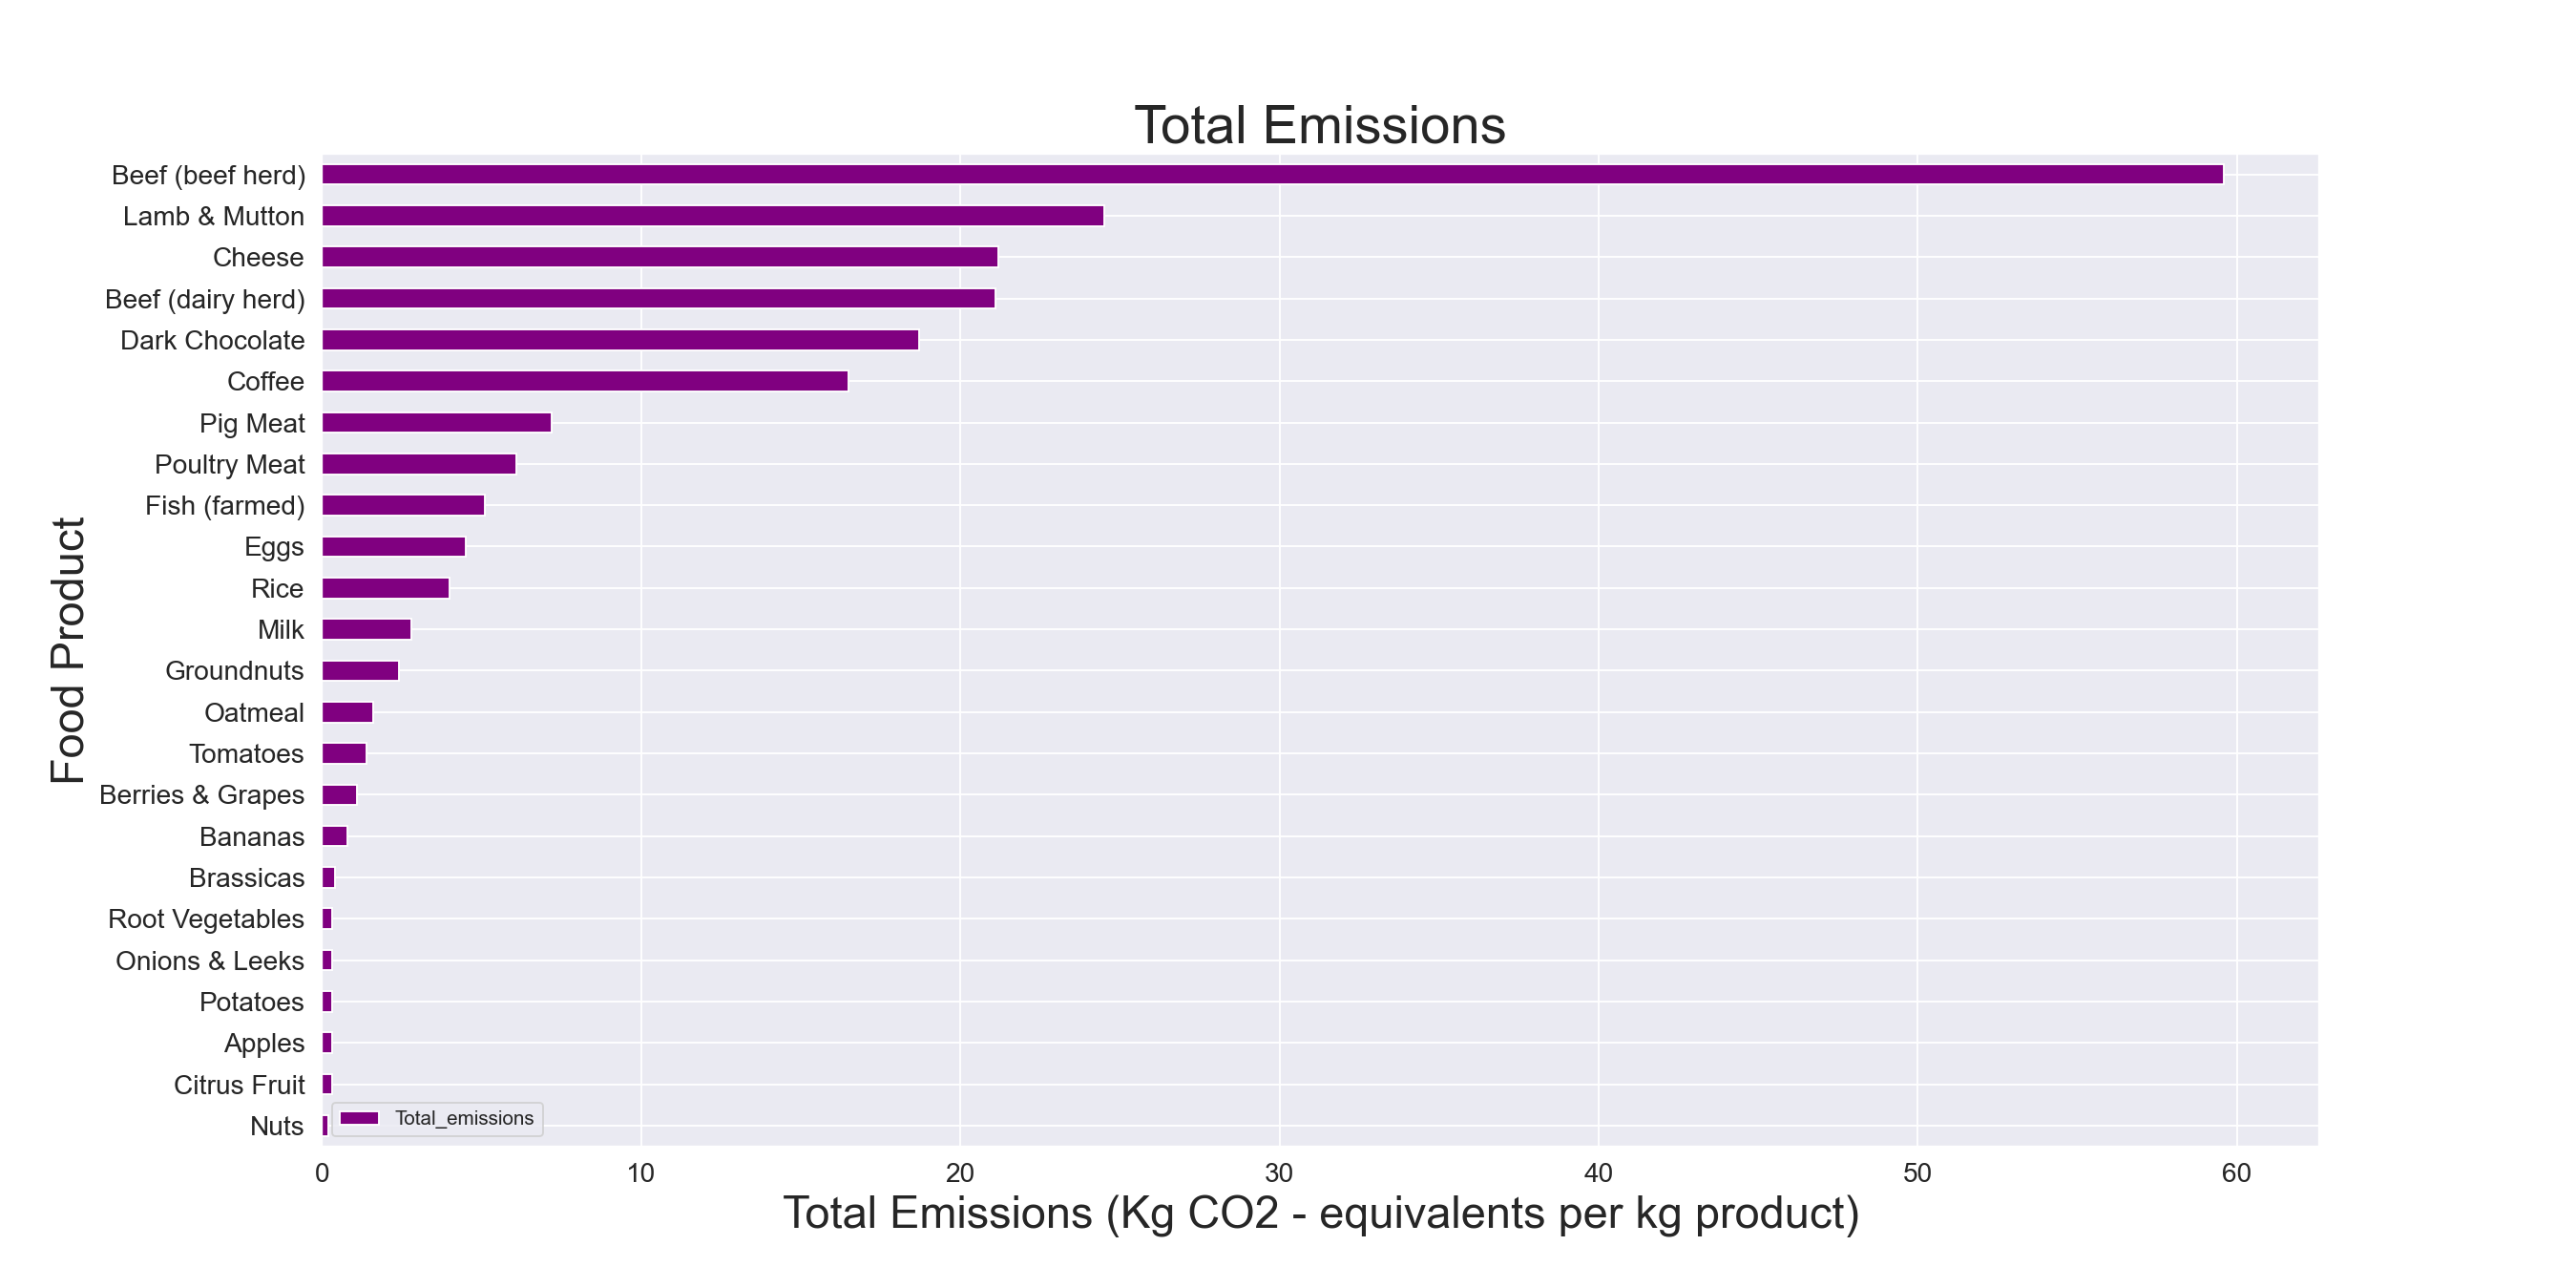

<ipython-input-30-745b40866ff7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_emissions_df.sort_values('Total_emissions', inplace=True)


In [30]:
#bar chart

fig, ax = plt.subplots(figsize = (20, 10))
sns.set()
total_emissions_df.sort_values('Total_emissions', inplace=True)
total_emissions_df.set_index('Food product').plot(fontsize = 15, kind='barh', stacked = True, ax = ax, color = "purple")
plt.xlabel("Total Emissions (Kg CO2 - equivalents per kg product)", size = 25)
plt.ylabel("Food Product", size = 25)
plt.title("Total Emissions", size = 30)
plt.savefig('MK_total emissions.png')
plt.show()

In [15]:
#Eutrophying
#Eutrophication – the pollution of water bodies and ecosystems with excess nutrients – is a major environmental problem. The runoff of nitrogen and other nutrients from agricultural production systems is a leading contributor.

eutrophying_df = impact_df[['Food product','Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)']]
eutrophying_df.sort_values(by = 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)') 

,Food product,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)
4,Groundnuts,2.437931
11,Apples,3.020833
3,Nuts,3.113821
0,Oatmeal,4.281357
7,Root Vegetables,4.351351
2,Potatoes,4.754098
10,Bananas,5.483333
9,Citrus Fruit,7.000000
6,Onions & Leeks,8.756757
1,Rice,9.514379


<IPython.core.display.Javascript object>


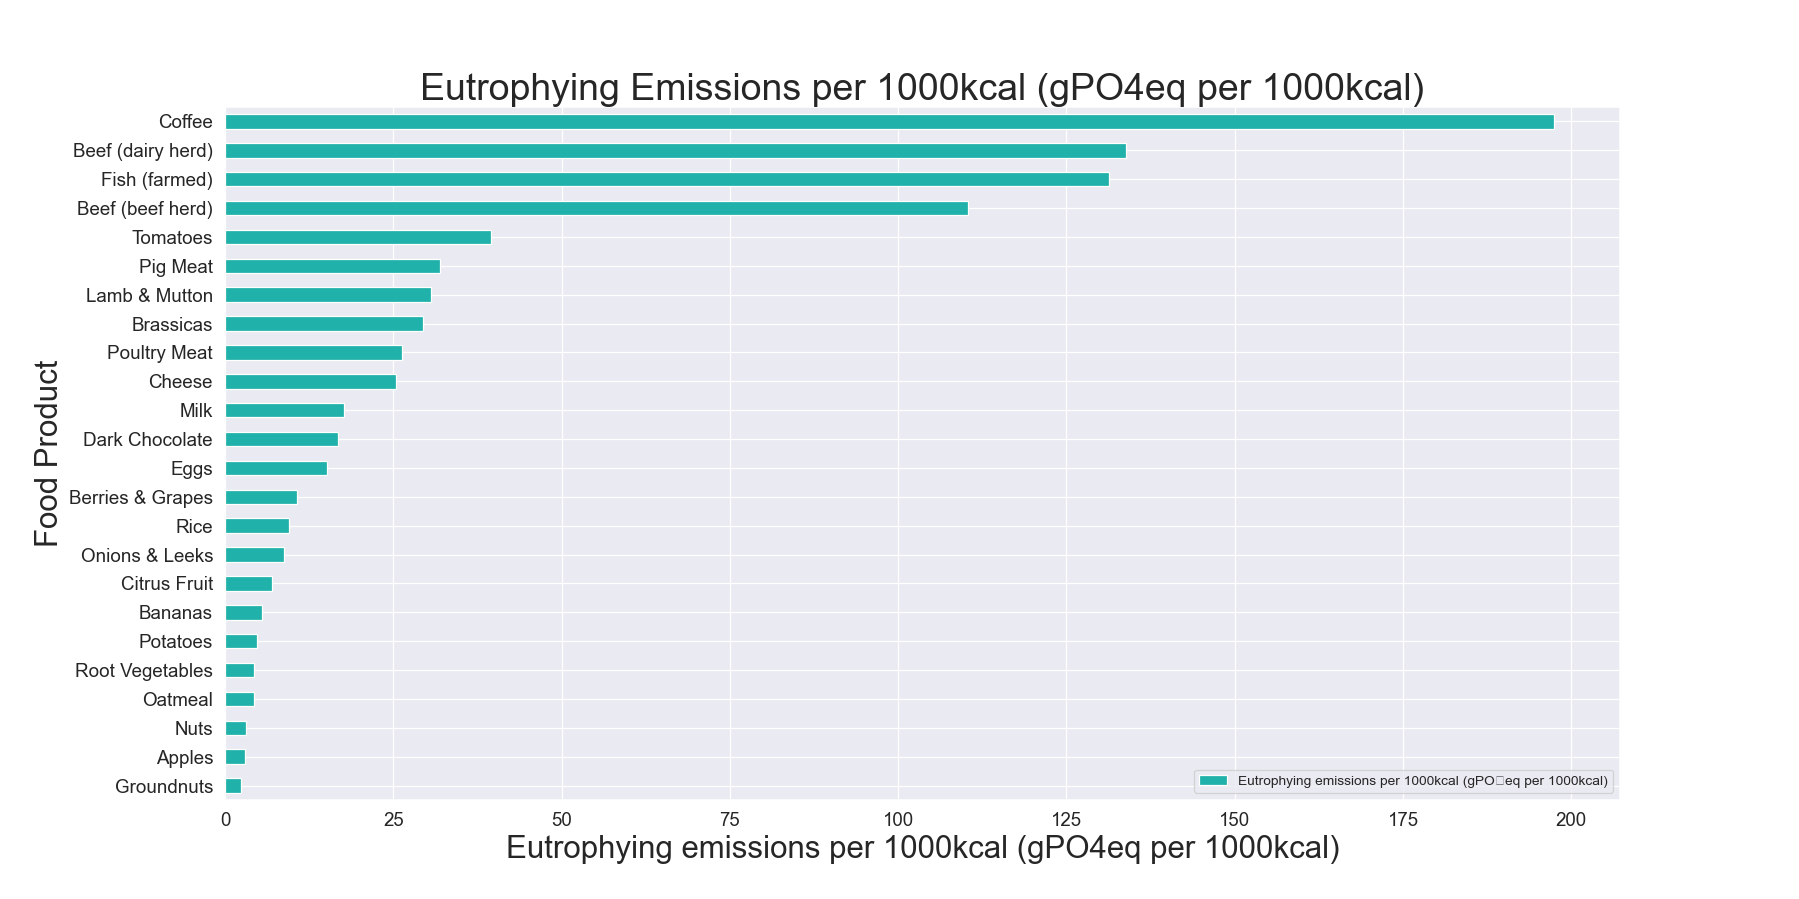

<ipython-input-24-b8817697ac92>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eutrophying_df.sort_values('Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)', inplace=True)


In [24]:
#bar chart

fig, ax = plt.subplots(figsize = (20, 10))
sns.set()
eutrophying_df.sort_values('Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)', inplace=True)
eutrophying_df.set_index('Food product').plot(fontsize = 15, kind='barh', stacked = True, ax = ax, color = "lightseagreen")
plt.xlabel("Eutrophying emissions per 1000kcal (gPO4eq per 1000kcal)", size = 25)
plt.ylabel("Food Product", size = 25)
plt.title("Eutrophying Emissions per 1000kcal (gPO4eq per 1000kcal)", size = 30)
plt.savefig('MK_Eutrophying emissions.png')
plt.show()

In [17]:
#Sort by Greenhouse gas emissions per 1000kcal 
#A greenhouse gas is a gas that absorbs and emits radiant energy within the thermal infrared range. Greenhouse gases cause the greenhouse effect on planets. The primary greenhouse gases in Earth's atmosphere are water vapor, carbon dioxide, methane, nitrous oxide, and ozone

greenhousekcal_df = impact_df[['Food product','Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)']]
greenhousekcal_df.sort_values(by = 'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)') 

,Food product,Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)
3,Nuts,0.069919
4,Groundnuts,0.556897
2,Potatoes,0.628415
11,Apples,0.895833
0,Oatmeal,0.945482
7,Root Vegetables,1.162162
1,Rice,1.207271
9,Citrus Fruit,1.218750
6,Onions & Leeks,1.351351
10,Bananas,1.433333


<IPython.core.display.Javascript object>


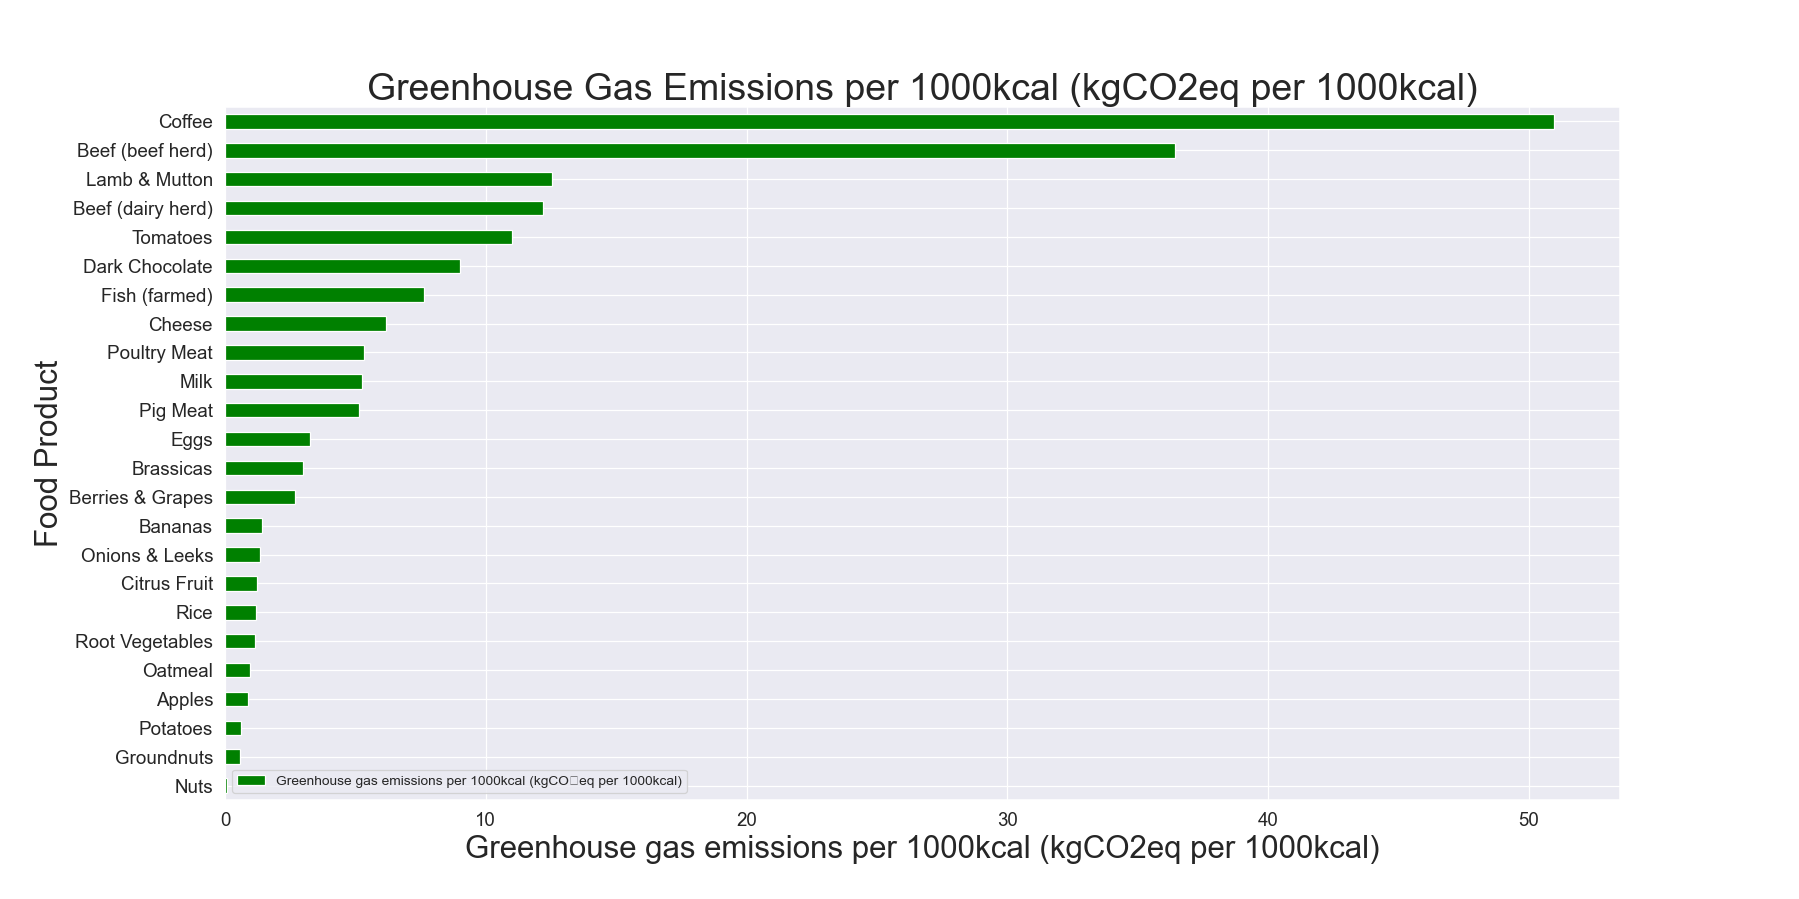

<ipython-input-26-ae885970bc8e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greenhousekcal_df.sort_values('Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)', inplace=True)


In [26]:
#bar chart 
fig, ax = plt.subplots(figsize = (20, 10))
sns.set()
greenhousekcal_df.sort_values('Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)', inplace=True)
greenhousekcal_df.set_index('Food product').plot(fontsize = 15, kind='barh', stacked = True, ax = ax, color = "green")
plt.xlabel("Greenhouse gas emissions per 1000kcal (kgCO2eq per 1000kcal)", size = 25)
plt.ylabel("Food Product", size = 25)
plt.title("Greenhouse Gas Emissions per 1000kcal (kgCO2eq per 1000kcal)", size = 30)
plt.savefig('MK_greenhouse emissions kcal.png')
plt.show()

In [19]:
#Sort by Greenhouse gas emissions per 1000g protein 

greenhouseprotein_df = impact_df[['Food product','Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)']]
greenhouseprotein_df.sort_values(by = 'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)') 

,Food product,Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)
3,Nuts,0.263319
4,Groundnuts,1.233766
0,Oatmeal,1.907692
2,Potatoes,2.705882
6,Onions & Leeks,3.846154
22,Eggs,4.208724
7,Root Vegetables,4.300000
8,Brassicas,4.636364
19,Poultry Meat,5.698614
23,Fish (farmed),5.976759


<IPython.core.display.Javascript object>


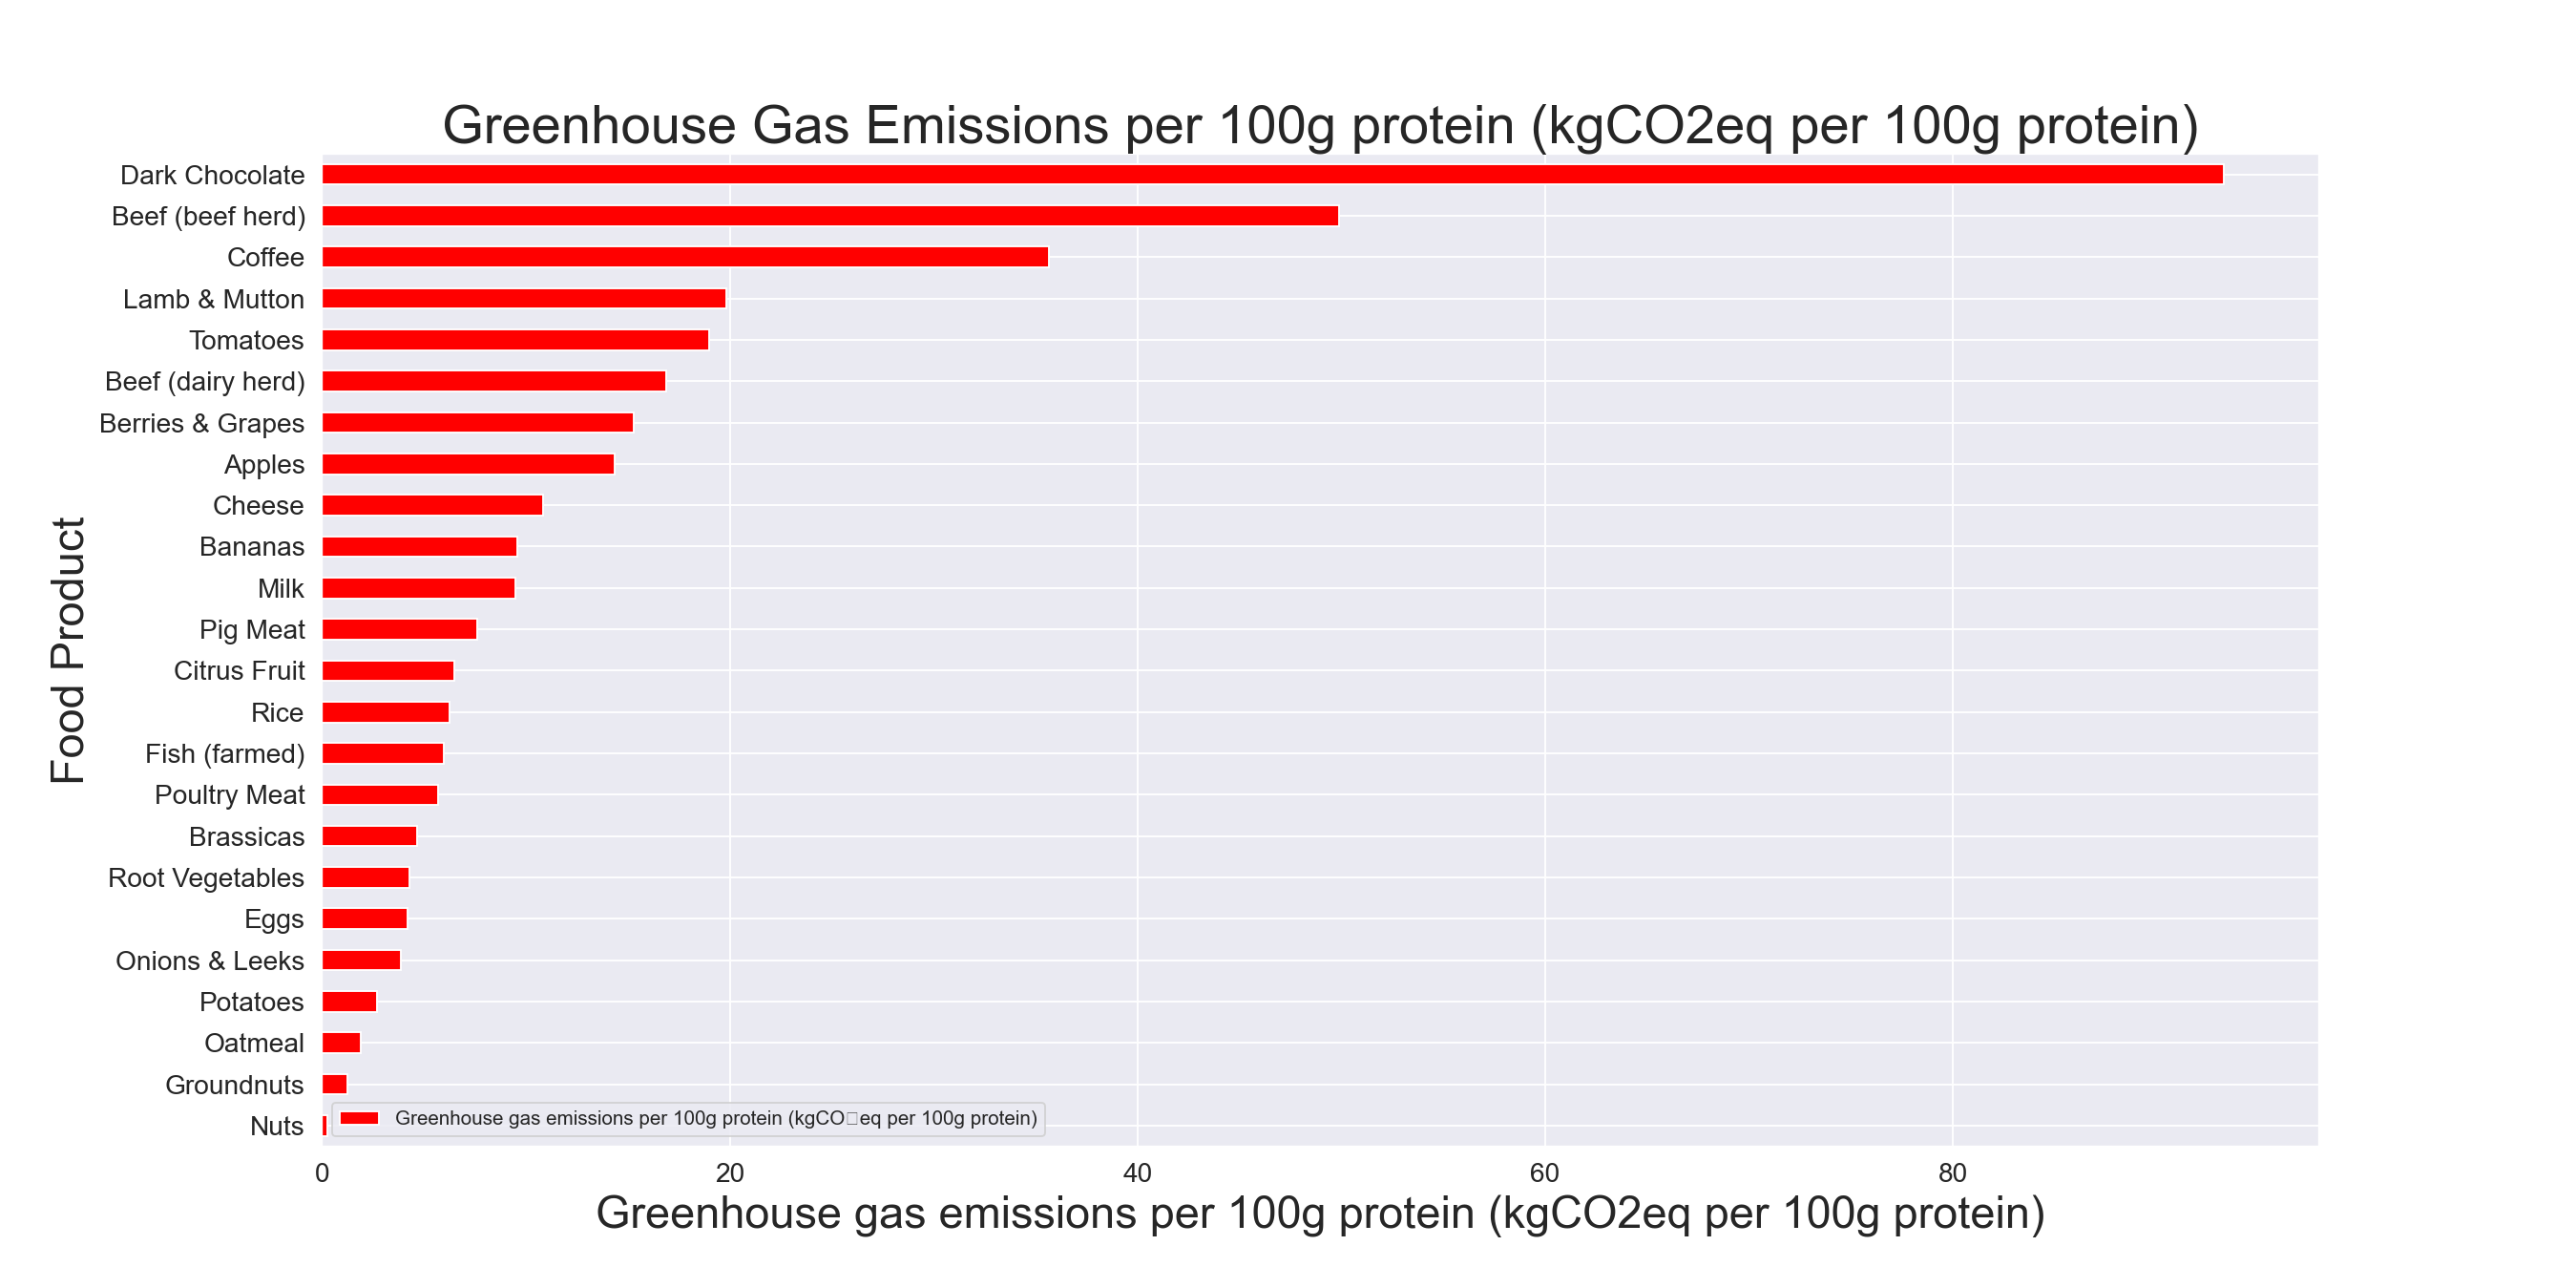

<ipython-input-31-dd1672ec2ed0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greenhouseprotein_df.sort_values('Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)', inplace=True)


In [31]:
#side bar chart

fig, ax = plt.subplots(figsize = (20, 10))
sns.set()
greenhouseprotein_df.sort_values('Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)', inplace=True)
greenhouseprotein_df.set_index('Food product').plot(fontsize = 15, kind='barh', stacked = True, ax = ax, color = "red")
plt.xlabel("Greenhouse gas emissions per 100g protein (kgCO2eq per 100g protein)", size = 25)
plt.ylabel("Food Product", size = 25)
plt.title("Greenhouse Gas Emissions per 100g protein (kgCO2eq per 100g protein)", size = 30)
plt.savefig('MK_greenhouse emmissions protein.png')
plt.show()